# 日経平均株価 日足 Parabolic SAR

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import yfinance as yf

from funcs.technical import calculate_psar

In [3]:
code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

In [4]:
# 日足で過去 2 年分のデータを取得
df = ticker.history(period='1y', interval='1d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-23 00:00:00+09:00,38803.128906,39129.468750,38617.429688,39103.218750,107800000,0.0,0.0
2024-05-24 00:00:00+09:00,38506.031250,38740.820312,38367.699219,38646.109375,96300000,0.0,0.0
2024-05-27 00:00:00+09:00,38766.210938,38900.019531,38667.929688,38900.019531,94200000,0.0,0.0
2024-05-28 00:00:00+09:00,38879.148438,38981.968750,38756.128906,38855.371094,101200000,0.0,0.0
2024-05-29 00:00:00+09:00,38880.500000,39141.988281,38524.238281,38556.871094,123900000,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 00:00:00+09:00,37572.359375,37656.230469,37445.929688,37498.628906,107600000,0.0,0.0
2025-05-20 00:00:00+09:00,37723.601562,37921.808594,37455.699219,37529.488281,125800000,0.0,0.0
2025-05-21 00:00:00+09:00,37590.148438,37659.941406,37298.980469,37298.980469,121300000,0.0,0.0


## Parabolic SAR

--- PSAR初期設定 (idx 1) ---
  bull: False, current_sar: 39129.47, current_ep: 38367.70, current_af: 0.020
Date: 2024-05-27, Close: 38900.02
  bull: False, reversed: False
  SAR: 39114.23, EP: 38367.70, AF: 0.020
  psarbull[i]: nan (if not nan), psarbear[i]: 39114.23 (if not nan)

Date: 2024-05-28, Close: 38855.37
  bull: False, reversed: False
  SAR: 39099.30, EP: 38367.70, AF: 0.020
  psarbull[i]: nan (if not nan), psarbear[i]: 39099.30 (if not nan)

Date: 2024-05-29, Close: 38556.87
  bull: False, reversed: False
  SAR: 39141.99, EP: 38367.70, AF: 0.020
  psarbull[i]: nan (if not nan), psarbear[i]: 39141.99 (if not nan)

Date: 2024-05-30, Close: 38054.13
  bull: False, reversed: False
  SAR: 39141.99, EP: 37617.00, AF: 0.040
  psarbull[i]: nan (if not nan), psarbear[i]: 39141.99 (if not nan)

Date: 2024-05-31, Close: 38487.90
  bull: False, reversed: False
  SAR: 39080.99, EP: 37617.00, AF: 0.040
  psarbull[i]: nan (if not nan), psarbear[i]: 39080.99 (if not nan)

Date: 2024-06-03, Clos

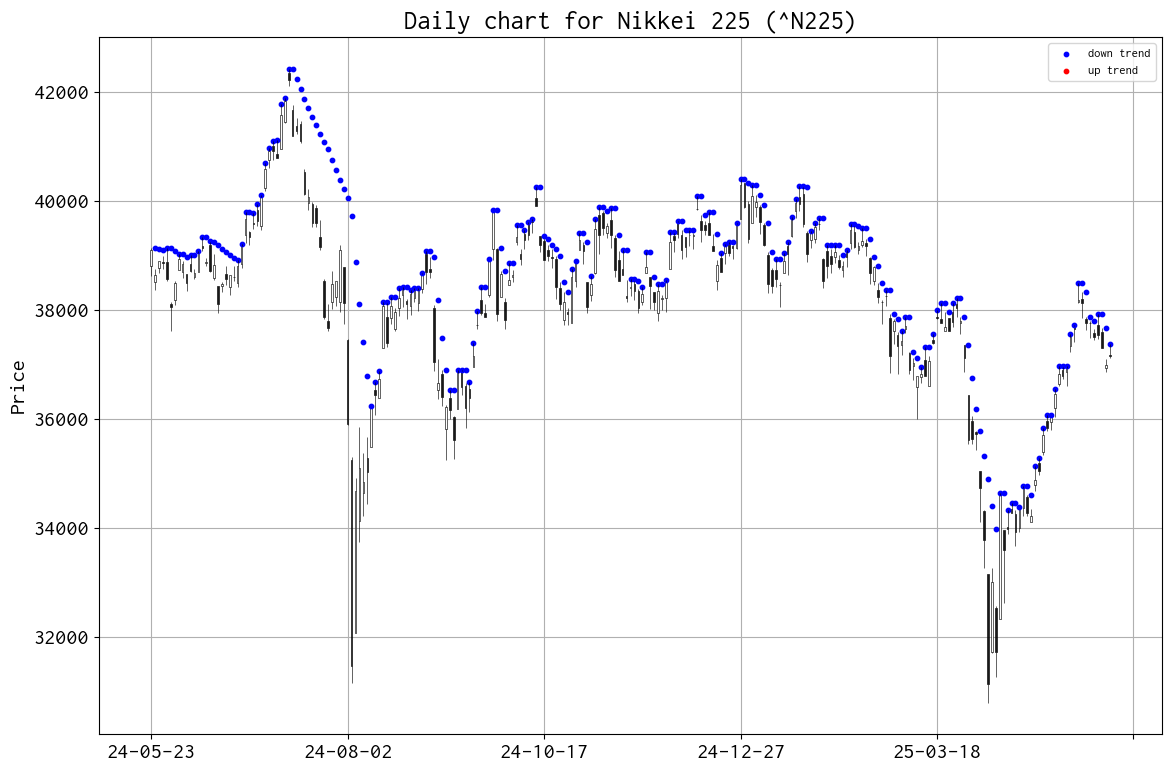

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

dict_psar = calculate_psar(df)
apds  = [
    mpf.make_addplot(
        dict_psar["bear"],
        type="scatter",
        marker="o",
        markersize=10,
        color="blue",
        label="down trend",
        ax=ax,
    ),
    mpf.make_addplot(
        dict_psar["bull"],
        type="scatter",
        marker="o",
        markersize=10,
        color="red",
        label="up trend",
        ax=ax,
    ),
]   

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s' % symbol)

plt.tight_layout()
plt.savefig('report_daily_chart_parabolic_%s.png' % code)
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-23 00:00:00+09:00,38803.128906,39129.468750,38617.429688,39103.218750,107800000,0.0,0.0
2024-05-24 00:00:00+09:00,38506.031250,38740.820312,38367.699219,38646.109375,96300000,0.0,0.0
2024-05-27 00:00:00+09:00,38766.210938,38900.019531,38667.929688,38900.019531,94200000,0.0,0.0
2024-05-28 00:00:00+09:00,38879.148438,38981.968750,38756.128906,38855.371094,101200000,0.0,0.0
2024-05-29 00:00:00+09:00,38880.500000,39141.988281,38524.238281,38556.871094,123900000,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 00:00:00+09:00,37572.359375,37656.230469,37445.929688,37498.628906,107600000,0.0,0.0
2025-05-20 00:00:00+09:00,37723.601562,37921.808594,37455.699219,37529.488281,125800000,0.0,0.0
2025-05-21 00:00:00+09:00,37590.148438,37659.941406,37298.980469,37298.980469,121300000,0.0,0.0
